In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps, cm, colors, ticker
import h5py
from findiff import FinDiff
from numpy import log10 as log

In [2]:
f = h5py.File("out_M8_Re900.0.h5")
bk = f["BEk"][:]
uk = f["UEk"][:]
uk[uk==0.0] = np.nan
bk[bk==0.0] = np.nan

In [3]:
ts = f["sim_time"][:]/(2*np.pi)
k = np.arange(1, 91)
kk, tt = np.meshgrid(k, ts)

In [4]:
d_dt = FinDiff(0, ts[1] - ts[0])
g_u = d_dt(np.log(uk))
g_b = d_dt(np.log(bk))
# Mask suspicious funny stuff?
g_u[(g_u > 25) | (g_u < -5)] = np.nan
g_b[(g_b > 30) | (g_b < -5)] = np.nan

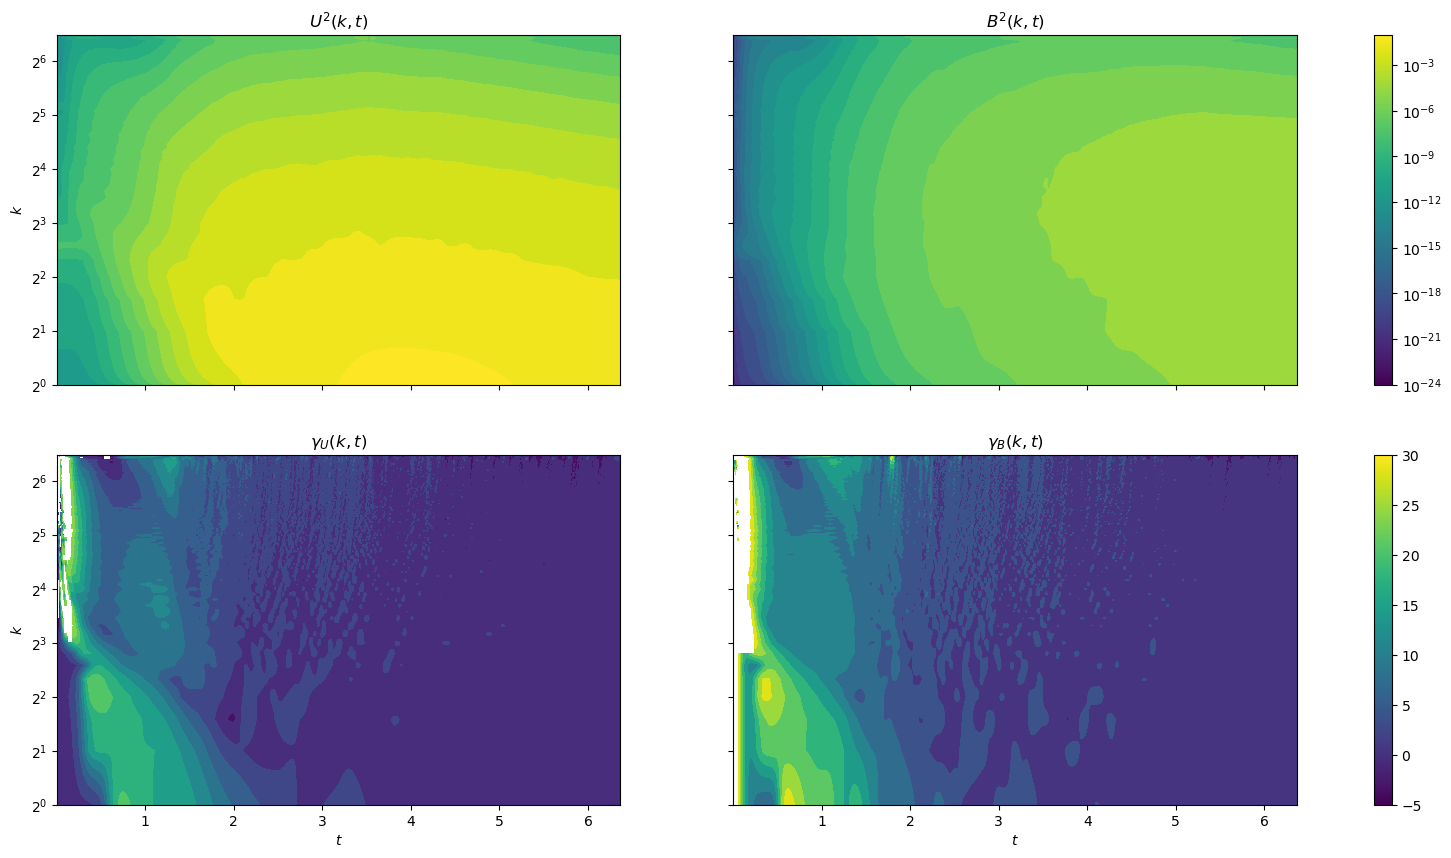

In [7]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(20, 10))
datas = np.array([[uk, bk], [g_u, g_b]])
titles = np.array([["$U^2(k, t)$", "$B^2(k, t)$"], ["$\gamma_U(k, t)$", "$\gamma_B(k, t)$"]])

for i in (0, 1):
    if not i:
        cmap = colormaps["viridis"]
        normalizer = colors.LogNorm(1e-24, 1e-1)
        im = cm.ScalarMappable(norm=normalizer, cmap=cmap)
        tk=ticker.LogLocator(numticks=30)
    else:
        cmap = colormaps["viridis"]
        normalizer = colors.Normalize(-5, 30)
        im = cm.ScalarMappable(norm=normalizer, cmap=cmap)
        tk = ticker.LinearLocator()
    for j in (0, 1):
        data = datas[i, j]
        ax = axs[i, j]
        ax.contourf(tt, kk, data, cmap=cmap, norm=normalizer, locator=tk)
        ax.set_yscale("log", base=2)
        ax.set_title(titles[i, j])
        if i:
            ax.set_xlabel("$t$")
        if not j:
            ax.set_ylabel("$k$")
    fig.colorbar(im, ax=axs[i].ravel().tolist())
plt.savefig("gamma_spectrum.pdf")

In [6]:
from tqdm import tqdm
for (i, t) in tqdm(enumerate(ts[:])):
    if i % 10 == 0:
        fig, ax = plt.subplots()
        ax.plot(k, uk[i], label="$U^2(k)$")
        ax.plot(k, bk[i], label="$B^2(k)$")
        ax.set_yscale("log")
        ax.set_xscale("log", base=2)
        ax.set_xlabel("$k$")
        ax.set_ylabel("$E(k)$")
        fig.legend()
        fig.suptitle(f"Energy spectrum, t={t:2.3f}")
        plt.savefig(f"frames/Ek{i:05}.jpg")
        plt.close()

4000it [02:09, 30.89it/s]
